In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CIFAR)

In [3]:
# tfms = aug_transforms(do_flip=False)
data = ImageDataLoaders.from_folder(path, valid_pct=0.2, seed=42, item_tfms=Resize(128))
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

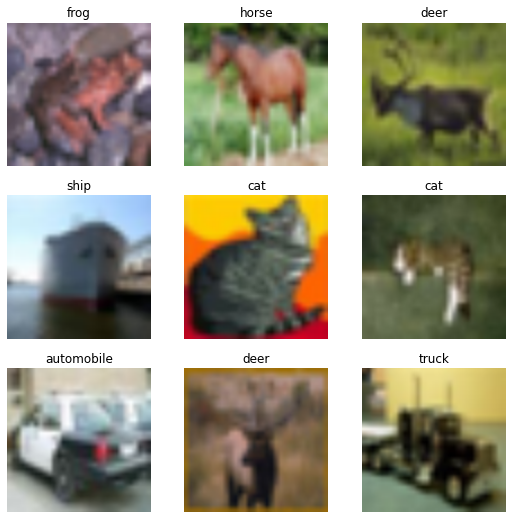

In [4]:
data.show_batch()

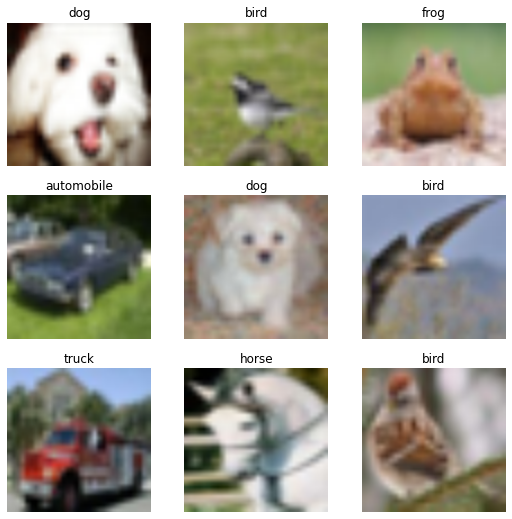

In [5]:
data.valid.show_batch()

## Training time:

In [6]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.431244,0.310377,0.896583,02:29


epoch,train_loss,valid_loss,accuracy,time
0,0.185257,0.139085,0.953833,03:14


In [ ]:
learn.save('stage-1-1e-0.95')

In [6]:
learn.load('stage-1-1e-0.95')

In [7]:
learn.validate()

(#2) [0.14255069196224213,0.9526666402816772]

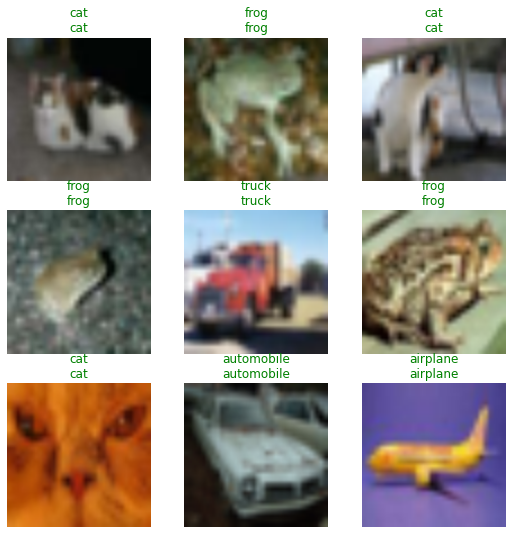

In [8]:
learn.show_results()

## Make the test data loader:

In [9]:
tst_files = get_image_files('/home/jelena/cifar10/test')

In [10]:
tst_dl = data.test_dl(tst_files)

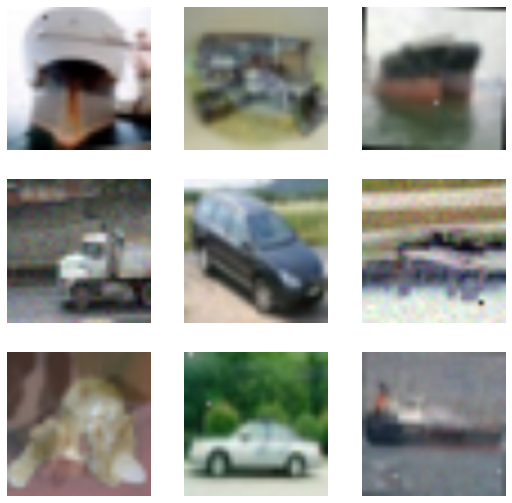

In [11]:
tst_dl.show_batch()

## Run the model on the test data:

In [12]:
preds, _ = learn.get_preds(dl = tst_dl)

In [13]:
labels = np.argmax(preds, 1)

## Sanity cheks:

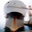

In [26]:
img = PILImage.create('/home/jelena/cifar10/test/' + filenames[0]); img

In [16]:
labels[0]

tensor(8)

## Make submission file:

In [14]:
filenames = []
for i in range(len(preds)):
    filenames.append(str(tst_dl.items[i]).split('/')[-1])

In [30]:
df = (pd.DataFrame(data={"label": labels, "Filename": [f.replace('.png', '') for f in filenames]})
      .sort_values(by='Filename'))

In [31]:
labels_dict =  {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [32]:
df.replace({"label":labels_dict}, inplace=True)

df.columns = ['id', 'label']

In [33]:
df.head()

,id,label
6329,1,deer
125418,10,cat
126885,100,bird
106690,1000,deer
248256,10000,frog


In [34]:
df.shape

(300000, 2)

In [35]:
df.to_csv("submit01.csv", index=False)

In [40]:
# ! ls
# !kaggle competitions submit -c cifar-10 -f submit01.csv -m "Message"